In [ ]:
# Upload your kaggle.json file using this cell so that you can use the kaggle API
!pip install -q kaggle
from google.colab import files

files.upload()

Saving kaggle.json to kaggle (1).json


{'kaggle (1).json': b'{"username":"islamwaheed1","key":"66ee57ffc46c1269ed871b79d5e5b60c"}'}

In [ ]:
# This cell creates a .kaggle hidden folder in our root directory and copies the kaggle.json file to the folder.
! mkdir ~/.kaggle

! cp kaggle.json ~/.kaggle/
! chmod 600 /root/.kaggle/kaggle.json

mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [ ]:
!kaggle datasets download -d hsankesara/medium-articles
!unzip /content/medium-articles.zip

medium-articles.zip: Skipping, found more recently modified local copy (use --force to force download)
Archive:  /content/medium-articles.zip
replace articles.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: articles.csv            


In [ ]:
# Display the resulting DataFrame
import pandas as pd

df = pd.read_csv('/content/articles.csv')

df.head()

,author,claps,reading_time,link,title,text
0,Justin Lee,8.3K,11,https://medium.com/swlh/chatbots-were-the-next...,Chatbots were the next big thing: what happene...,"Oh, how the headlines blared:\nChatbots were T..."
1,Conor Dewey,1.4K,7,https://towardsdatascience.com/python-for-data...,Python for Data Science: 8 Concepts You May Ha...,If you’ve ever found yourself looking up the s...
2,William Koehrsen,2.8K,11,https://towardsdatascience.com/automated-featu...,Automated Feature Engineering in Python – Towa...,Machine learning is increasingly moving from h...
3,Gant Laborde,1.3K,7,https://medium.freecodecamp.org/machine-learni...,Machine Learning: how to go from Zero to Hero ...,If your understanding of A.I. and Machine Lear...
4,Emmanuel Ameisen,935,11,https://blog.insightdatascience.com/reinforcem...,Reinforcement Learning from scratch – Insight ...,Want to learn about applied Artificial Intelli...


In [ ]:
df.shape

(337, 6)

In [ ]:
#look at dataset columns
df.columns


Index(['author', 'claps', 'reading_time', 'link', 'title', 'text'], dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 337 entries, 0 to 336
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   author        337 non-null    object
 1   claps         337 non-null    object
 2   reading_time  337 non-null    int64 
 3   link          337 non-null    object
 4   title         337 non-null    object
 5   text          337 non-null    object
dtypes: int64(1), object(5)
memory usage: 15.9+ KB


In [ ]:
# Count the number of duplicated rows in the DataFrame
df.duplicated().sum()

0

In [ ]:
import matplotlib.pyplot as plt


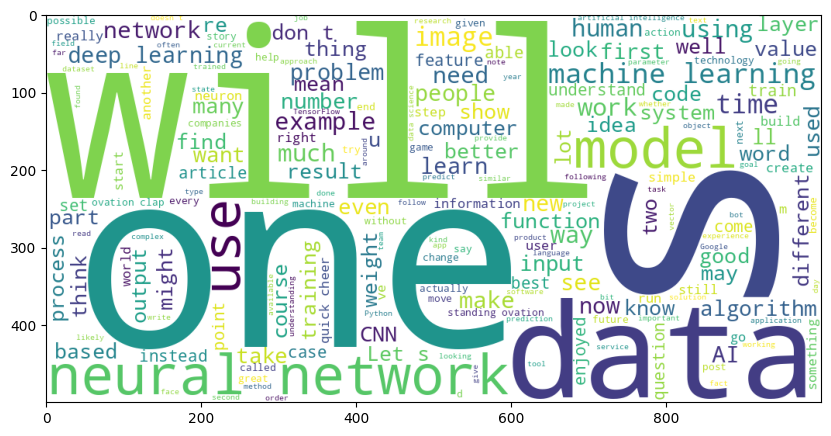

In [ ]:
plt.figure(figsize=(10,6))
from wordcloud import WordCloud, STOPWORDS
word_cloud = ""
for row in df['text']:
    for word in row:
        word_cloud += " ".join(word)
wordcloud = WordCloud(width = 1000, height = 500,background_color ='white',min_font_size = 10).generate(word_cloud)
plt.imshow(wordcloud)

In [ ]:
!pip install sentence_transformers

In [ ]:
from sentence_transformers import SentenceTransformer
from sklearn.metrics.pairwise import cosine_similarity

In [ ]:
model = SentenceTransformer(
    'sentence-transformers/msmarco-distilbert-base-dot-prod-v3')

In [ ]:
!pip install yake

In [ ]:
!pip install rake_nltk

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
import nltk
nltk.download('punkt')
nltk.download('stopwords')
from nltk.corpus import stopwords
import string
import re
import unicodedata
import yake
from rake_nltk import Rake

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
# Function to preprocess the text
def preprocess_text(text):
    # Remove non-ASCII characters
    text = unicodedata.normalize('NFKD', text).encode('ascii', 'ignore').decode('utf-8', 'ignore')

    # Convert to lowercase
    text = text.lower()

    # Remove punctuation
    translator = str.maketrans('', '', string.punctuation)
    text = text.translate(translator)

    # Replace numbers
    text = re.sub(r'\d+', '', text)

    # Remove whitespaces
    text = text.strip()

    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    words = text.split()
    words = [word for word in words if word not in stop_words]
    text = ' '.join(words)

    return text

In [ ]:
# Function to extract keywords from a sentence using TF-IDF
def extract_keywords_usingTFIDF(sentence):
    tfidf_vectorizer = TfidfVectorizer()
    tfidf_matrix = tfidf_vectorizer.fit_transform([sentence])
    feature_names = tfidf_vectorizer.get_feature_names_out()
    tfidf_scores = tfidf_matrix.toarray()[0]
    keywords = [feature_names[i] for i in tfidf_scores.argsort()[::-1][:10]]
    return keywords

In [ ]:
# Function to extract keywords from preprocessed text using TF
def extract_keywords_usingTF(sentence):
    tf_vectorizer = TfidfVectorizer(use_idf=False)
    tf_matrix = tf_vectorizer.fit_transform([sentence])
    feature_names = tf_vectorizer.get_feature_names_out()
    tf_scores = tf_matrix.toarray()[0]
    keywords = [feature_names[i] for i in tf_scores.argsort()[::-1][:10]]
    return keywords

In [ ]:
# Function to extract keywords using YAKE
def extract_yake_keywords(sentence):
    language = "en"
    max_ngram_size = 1
    deduplication_threshold = 0.9
    deduplication_algo = 'seqm'
    windowSize = 1
    numOfKeywords = 10

    custom_kw_extractor = yake.KeywordExtractor(lan=language, n=max_ngram_size, dedupLim=deduplication_threshold,
                                                dedupFunc=deduplication_algo, windowsSize=windowSize, top=numOfKeywords,
                                                features=None)
    keywords = custom_kw_extractor.extract_keywords(sentence)
    keywords = [kw for kw, _ in keywords]
    return keywords

In [ ]:
df

,author,claps,reading_time,link,title,text
0,Justin Lee,8.3K,11,https://medium.com/swlh/chatbots-were-the-next...,Chatbots were the next big thing: what happene...,"Oh, how the headlines blared:\nChatbots were T..."
1,Conor Dewey,1.4K,7,https://towardsdatascience.com/python-for-data...,Python for Data Science: 8 Concepts You May Ha...,If you’ve ever found yourself looking up the s...
2,William Koehrsen,2.8K,11,https://towardsdatascience.com/automated-featu...,Automated Feature Engineering in Python – Towa...,Machine learning is increasingly moving from h...
3,Gant Laborde,1.3K,7,https://medium.freecodecamp.org/machine-learni...,Machine Learning: how to go from Zero to Hero ...,If your understanding of A.I. and Machine Lear...
4,Emmanuel Ameisen,935,11,https://blog.insightdatascience.com/reinforcem...,Reinforcement Learning from scratch – Insight ...,Want to learn about applied Artificial Intelli...
...,...,...,...,...,...,...
332,Daniel Simmons,3.4K,8,https://itnext.io/you-can-build-a-neural-netwo...,You can build a neural network in JavaScript e...,Click here to share this article on LinkedIn »...
333,Eugenio Culurciello,2.8K,13,https://towardsdatascience.com/artificial-inte...,"Artificial Intelligence, AI in 2018 and beyond...",These are my opinions on where deep neural net...
334,Devin Soni,5.8K,4,https://towardsdatascience.com/spiking-neural-...,"Spiking Neural Networks, the Next Generation o...",Everyone who has been remotely tuned in to rec...
335,Carlos E. Perez,3.9K,7,https://medium.com/intuitionmachine/neurons-ar...,Surprise! Neurons are Now More Complex than We...,One of the biggest misconceptions around is th...


In [ ]:
df['Preprocessed Text'] = df['text'].apply(preprocess_text)
# Extract keywords from each sentence in the DataFrame
df['HOTkeywords_yake'] = df['Preprocessed Text'].apply(extract_yake_keywords)
df['HOTkeywords_tfidf'] = df['Preprocessed Text'].apply(extract_keywords_usingTFIDF)
df['HOTkeywords_tf'] = df['Preprocessed Text'].apply(extract_keywords_usingTF)

In [ ]:
df.head()

,author,claps,reading_time,link,title,text,Preprocessed Text,HOTkeywords_yake,HOTkeywords_tfidf,HOTkeywords_tf
0,Justin Lee,8.3K,11,https://medium.com/swlh/chatbots-were-the-next...,Chatbots were the next big thing: what happene...,"Oh, how the headlines blared:\nChatbots were T...",oh headlines blared chatbots next big thing ho...,"[bot, bots, chatbots, apps, information, human...","[bot, bots, chatbots, apps, thats, way, inform...","[bot, bots, chatbots, apps, thats, way, inform..."
1,Conor Dewey,1.4K,7,https://towardsdatascience.com/python-for-data...,Python for Data Science: 8 Concepts You May Ha...,If you’ve ever found yourself looking up the s...,youve ever found looking question concept synt...,"[data, list, functions, function, science, lam...","[functions, data, function, list, python, synt...","[functions, data, function, list, python, synt..."
2,William Koehrsen,2.8K,11,https://towardsdatascience.com/automated-featu...,Automated Feature Engineering in Python – Towa...,Machine learning is increasingly moving from h...,machine learning increasingly moving handdesig...,"[feature, features, data, featuretools, table,...","[feature, features, data, featuretools, table,...","[feature, features, data, featuretools, table,..."
3,Gant Laborde,1.3K,7,https://medium.freecodecamp.org/machine-learni...,Machine Learning: how to go from Zero to Hero ...,If your understanding of A.I. and Machine Lear...,understanding ai machine learning big question...,"[learning, machine, dont, youre, world, cool, ...","[ml, learning, machine, course, ai, even, get,...","[ml, learning, machine, course, ai, even, get,..."
4,Emmanuel Ameisen,935,11,https://blog.insightdatascience.com/reinforcem...,Reinforcement Learning from scratch – Insight ...,Want to learn about applied Artificial Intelli...,want learn applied artificial intelligence lea...,"[deep, learn, learning, function, policy, acti...","[learning, learn, deep, actions, policy, value...","[learning, learn, deep, actions, policy, value..."


In [ ]:
print(df['HOTkeywords_yake'][1])
print(df['HOTkeywords_tfidf'][1])
print(df['HOTkeywords_tf'][1])

['data', 'list', 'functions', 'function', 'science', 'lambda', 'python', 'youre', 'numpy', 'syntax']
['functions', 'data', 'function', 'list', 'python', 'syntax', 'one', 'numpy', 'pandas', 'science']
['functions', 'data', 'function', 'list', 'python', 'syntax', 'one', 'numpy', 'pandas', 'science']


In [ ]:
# Generate embeddings for the sentences
embeddings = model.encode(df['text'])

In [ ]:
embeddings

array([[-0.33390296, -0.57892776, -0.09136617, ...,  0.03243011,
        -0.38352805,  0.3993891 ],
       [-0.6362702 , -0.02323643, -0.40943676, ...,  0.11899168,
        -0.912112  ,  0.09896863],
       [-0.44043943, -0.2892328 , -0.347935  , ...,  0.02426712,
        -0.68288684,  0.31431156],
       ...,
       [-0.4344227 , -0.3735666 , -0.27309427, ...,  0.4050127 ,
        -0.65073586, -0.02207018],
       [-0.1915186 , -0.21913646, -0.26179296, ...,  0.23243567,
        -0.6981065 ,  0.08397222],
       [-0.23525655, -0.11954243, -0.2458709 , ...,  0.34499902,
        -0.6393702 ,  0.080209  ]], dtype=float32)

In [ ]:
embeddings.shape

(337, 768)

In [ ]:
# Add the embeddings to the DataFrame
df['embedding'] = embeddings.tolist()

In [ ]:
df.head()

,author,claps,reading_time,link,title,text,Preprocessed Text,HOTkeywords_yake,HOTkeywords_tfidf,HOTkeywords_tf,embedding
0,Justin Lee,8.3K,11,https://medium.com/swlh/chatbots-were-the-next...,Chatbots were the next big thing: what happene...,"Oh, how the headlines blared:\nChatbots were T...",oh headlines blared chatbots next big thing ho...,"[bot, bots, chatbots, apps, information, human...","[bot, bots, chatbots, apps, thats, way, inform...","[bot, bots, chatbots, apps, thats, way, inform...","[-0.3339029550552368, -0.578927755355835, -0.0..."
1,Conor Dewey,1.4K,7,https://towardsdatascience.com/python-for-data...,Python for Data Science: 8 Concepts You May Ha...,If you’ve ever found yourself looking up the s...,youve ever found looking question concept synt...,"[data, list, functions, function, science, lam...","[functions, data, function, list, python, synt...","[functions, data, function, list, python, synt...","[-0.6362702250480652, -0.023236434906721115, -..."
2,William Koehrsen,2.8K,11,https://towardsdatascience.com/automated-featu...,Automated Feature Engineering in Python – Towa...,Machine learning is increasingly moving from h...,machine learning increasingly moving handdesig...,"[feature, features, data, featuretools, table,...","[feature, features, data, featuretools, table,...","[feature, features, data, featuretools, table,...","[-0.4404394328594208, -0.2892327904701233, -0...."
3,Gant Laborde,1.3K,7,https://medium.freecodecamp.org/machine-learni...,Machine Learning: how to go from Zero to Hero ...,If your understanding of A.I. and Machine Lear...,understanding ai machine learning big question...,"[learning, machine, dont, youre, world, cool, ...","[ml, learning, machine, course, ai, even, get,...","[ml, learning, machine, course, ai, even, get,...","[-0.5250306129455566, -0.37941694259643555, -0..."
4,Emmanuel Ameisen,935,11,https://blog.insightdatascience.com/reinforcem...,Reinforcement Learning from scratch – Insight ...,Want to learn about applied Artificial Intelli...,want learn applied artificial intelligence lea...,"[deep, learn, learning, function, policy, acti...","[learning, learn, deep, actions, policy, value...","[learning, learn, deep, actions, policy, value...","[-0.19904573261737823, -0.07459782809019089, -..."


In [ ]:

df.to_csv('/content/embeddings_data.csv')

In [ ]:
search = "Deep Learning"

In [ ]:
sentence_vector = model.encode(search)

In [ ]:
sentence_vector = model.encode(search).reshape(1, -1)
df["similarities"] = df['embedding'].apply(lambda x: cosine_similarity([x], sentence_vector)[0][0])

In [ ]:
df = df.sort_values("similarities", ascending=False)[:30]
df

,author,claps,reading_time,link,title,text,Preprocessed Text,HOTkeywords_yake,HOTkeywords_tfidf,HOTkeywords_tf,embedding,similarities
183,Venture Scanner,207,5,https://medium.com/@VentureScanner/the-state-o...,The State of Artificial Intelligence in Six Vi...,We cover many emerging markets in the startup ...,cover many emerging markets startup ecosystem ...,"[learning, recognition, learningmachine, compa...","[companies, recognition, learning, computer, s...","[companies, recognition, learning, computer, s...","[-0.4714120924472809, -0.4712098240852356, -0....",0.614717
329,Favio Vázquez,3.3K,14,https://towardsdatascience.com/a-weird-introdu...,A “weird” introduction to Deep Learning – Towa...,"There are amazing introductions, courses and b...",amazing introductions courses blog posts deep ...,"[learning, deep, data, networks, idea, neural,...","[learning, deep, data, dl, way, idea, networks...","[learning, deep, data, dl, way, idea, networks...","[-0.33701014518737793, -0.1345888376235962, -0...",0.605458
327,Gary Marcus,1.3K,27,https://medium.com/@GaryMarcus/in-defense-of-s...,In defense of skepticism about deep learning –...,In a recent appraisal of deep learning (Marcus...,recent appraisal deep learning marcus outlined...,"[learning, deep, neural, marcus, networks, sys...","[learning, deep, neural, marcus, networks, one...","[learning, deep, neural, marcus, networks, one...","[-0.42032384872436523, -0.2789430320262909, -0...",0.594357
209,Gary Marcus,1.3K,27,https://medium.com/@GaryMarcus/in-defense-of-s...,In defense of skepticism about deep learning –...,In a recent appraisal of deep learning (Marcus...,recent appraisal deep learning marcus outlined...,"[learning, deep, neural, marcus, networks, sys...","[learning, deep, neural, marcus, networks, one...","[learning, deep, neural, marcus, networks, one...","[-0.42032384872436523, -0.2789430320262909, -0...",0.594357
157,Emmanuel Ameisen,935,11,https://blog.insightdatascience.com/reinforcem...,Reinforcement Learning from scratch – Insight ...,Want to learn about applied Artificial Intelli...,want learn applied artificial intelligence lea...,"[deep, learn, learning, function, policy, acti...","[learning, learn, deep, actions, policy, value...","[learning, learn, deep, actions, policy, value...","[-0.19904573261737823, -0.07459782809019089, -...",0.582623
88,Emmanuel Ameisen,935,11,https://blog.insightdatascience.com/reinforcem...,Reinforcement Learning from scratch – Insight ...,Want to learn about applied Artificial Intelli...,want learn applied artificial intelligence lea...,"[deep, learn, learning, function, policy, acti...","[learning, learn, deep, actions, policy, value...","[learning, learn, deep, actions, policy, value...","[-0.19904573261737823, -0.07459782809019089, -...",0.582623
4,Emmanuel Ameisen,935,11,https://blog.insightdatascience.com/reinforcem...,Reinforcement Learning from scratch – Insight ...,Want to learn about applied Artificial Intelli...,want learn applied artificial intelligence lea...,"[deep, learn, learning, function, policy, acti...","[learning, learn, deep, actions, policy, value...","[learning, learn, deep, actions, policy, value...","[-0.19904573261737823, -0.07459782809019089, -...",0.582623
210,Bargava,11.8K,3,https://towardsdatascience.com/how-to-learn-de...,How to learn Deep Learning in 6 months – Towar...,"It is quite possible to learn, follow and cont...",quite possible learn follow contribute stateof...,"[learning, deep, time, step, learn, calculus, ...","[learning, deep, step, time, course, calculus,...","[learning, deep, step, time, course, calculus,...","[-0.3632699251174927, -0.12674957513809204, -0...",0.546516
177,Netflix Technology Blog,99,11,https://medium.com/netflix-techblog/distribute...,Distributed Neural Networks with GPUs in the A...,"by Alex Chen, Justin Basilico, and Xavier Amat...",alex chen justin basilico xavier amatriain des...,"[training, neural, network, gpu, aws, learning...","[training, using, gpu, different, u

In [ ]:
df['HOTkeywords_yake'][:2][0:]

183    [learning, recognition, learningmachine, compa...
329    [learning, deep, data, networks, idea, neural,...
Name: HOTkeywords_yake, dtype: object